# Weather Classification Using Deep Learning

This notebook demonstrates how to build a neural network to predict the weather category based on features like precipitation, temperature, and wind speed based on the seattle-weather dataset.

---

## Importing Libraries and loading the dataset
---

In [59]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "seattle-weather.csv" 
data = pd.read_csv(file_path)
# Print the count of each weather category
print(data['weather'].value_counts())
# Imbalanced dataset, though it does reflect real world scenarios

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


## Encode the Target Variable
We encode the categorical `weather` column into numerical values using `LabelEncoder`. This transforms normal string labels (e.g., "rain", "drizzle") into integer labels such as 0, 1, 2.

---

In [60]:
# Encode the weather column
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
data.head(20)

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


## Select Our Features and Target Variable
We select the following features for training:
- `precipitation`
- `temp_max`
- `temp_min`
- `wind`

The target variable is the  label-encoded `weather` column.

---

In [61]:
# Select all other columns as features and weather column as target Y
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather_encoded']

## Normalize the Features
To ensure that all input features contribute equally to the neural network, we ned to normalize the data, this can be done by using `MinMaxScaler`. This scales the features to a range of 0 to 1.

In [62]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Convert Weather to One-Hot Encoding
Since this is a multiclass classification problem, we need to convert the target variable into a one-hot encoded format to ensure the model predicts probabilities.

---

In [63]:
# Convert target column to one-hot encoding
y_categorical = to_categorical(y)

## Split the dataset
Split 20% of data to use for the test set to evaluate the model's performance and 80% of the data will be used for the model to train on.

---

In [64]:
# Split 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=2)

## Building the Neural Network Model
We construct a simple feed-forward neural network with the following:
- Input Layer: Matches the number of features from train set.
- Hidden Layers: Two dense layers with 64 and 32 neurons, respectively, both with ReLU activation.
- Dropout Layers: 2 dropout layers Added to reduce overfitting.
- Output Layer: Softmax activation to predict probabilities for each weather category.

---

In [65]:
# Build the feed forward model
ff_model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer
    Dense(64, activation='relu'), # 1st hiden layer
    Dropout(0.1), # drop 10% of neurons in each iteration to reduce overfitting
    Dense(32, activation='relu'), # 2nd hidden layer
    Dropout(0.1), # to reduce overfitting again
    Dense(y_train.shape[1], activation='softmax')  # Softmax at output layer for multiclass classification
])

## Compile the Model
We compile the model with the following settings:
- **Optimizer**: Adam (adaptive learning rate).
- **Loss Function**: Categorical Crossentropy (standard for multiclass classification).
- **Metrics**: Accuracy to monitor performance.

---

In [66]:
# Compile model
ff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(ff_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,565 (10.02 KB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

None


## Train the Model
The model is trained for 100 epochs (one pass through training dataset) with a batch size of 16. We also validate the model on the test set during training.

---

In [67]:
#train the model
history = ff_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4721 - loss: 1.3903 - val_accuracy: 0.6826 - val_loss: 0.9879
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 1.0311 - val_accuracy: 0.7372 - val_loss: 0.8917
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - loss: 0.9407 - val_accuracy: 0.7509 - val_loss: 0.8280
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - loss: 0.9043 - val_accuracy: 0.7543 - val_loss: 0.7807
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.8356 - val_accuracy: 0.7679 - val_loss: 0.7426
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 0.8278 - val_accuracy: 0.8157 - val_loss: 0.7080
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.7954 - val_accuracy: 0.8055 - val_loss: 0.6823
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.7701 - val_accuracy: 0.8020 - v

## Step 9: Evaluation Metrics
The model's performance is evaluated with the following metrics:
- **Loss**: Quantifies the error in predictions.
- **Accuracy**: Measures the percentage of correct predictions.

---

In [68]:
# Metrics
loss, accuracy = ff_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Loss: 0.4069
Accuracy: 0.8840


## Accuracy Plot
---

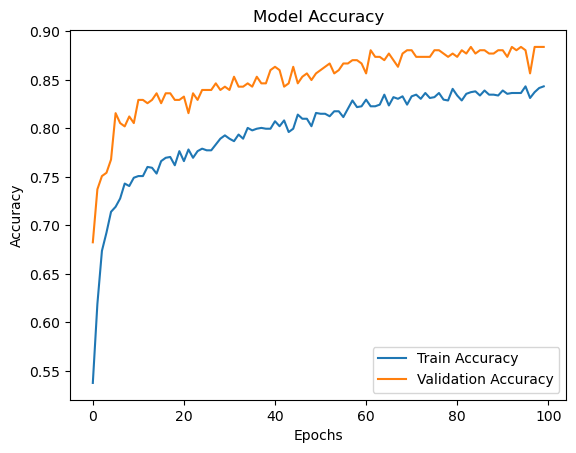

In [69]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Plot
---

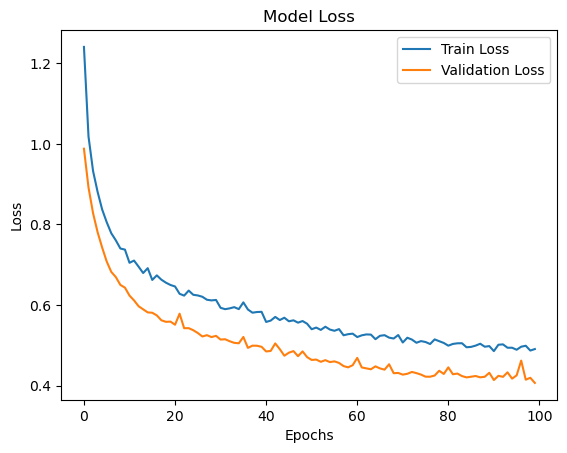

In [70]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Frequency Distribution of Weather Categories
---

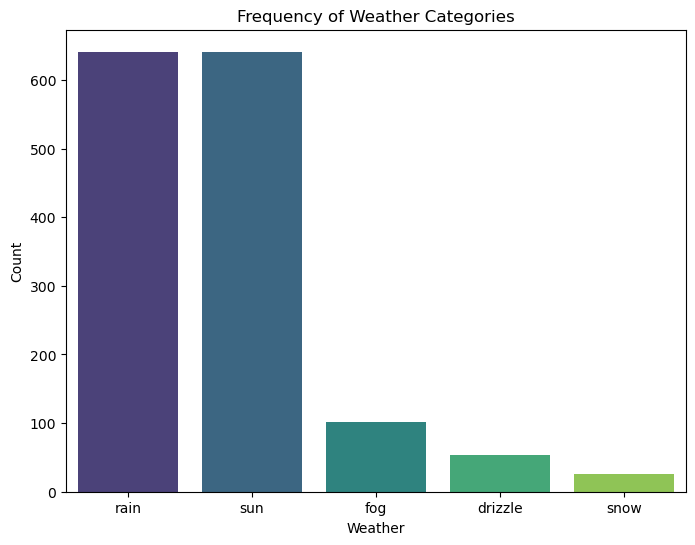

In [72]:
# Count the occurrences of each weather category
weather_counts = data['weather'].value_counts()
# Again demonstrating imbalanced dataset
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, hue=weather_counts.index, 
            dodge=False, palette='viridis', legend=False)
plt.title("Frequency of Weather Categories")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

## Scatterplot Matrix 
---

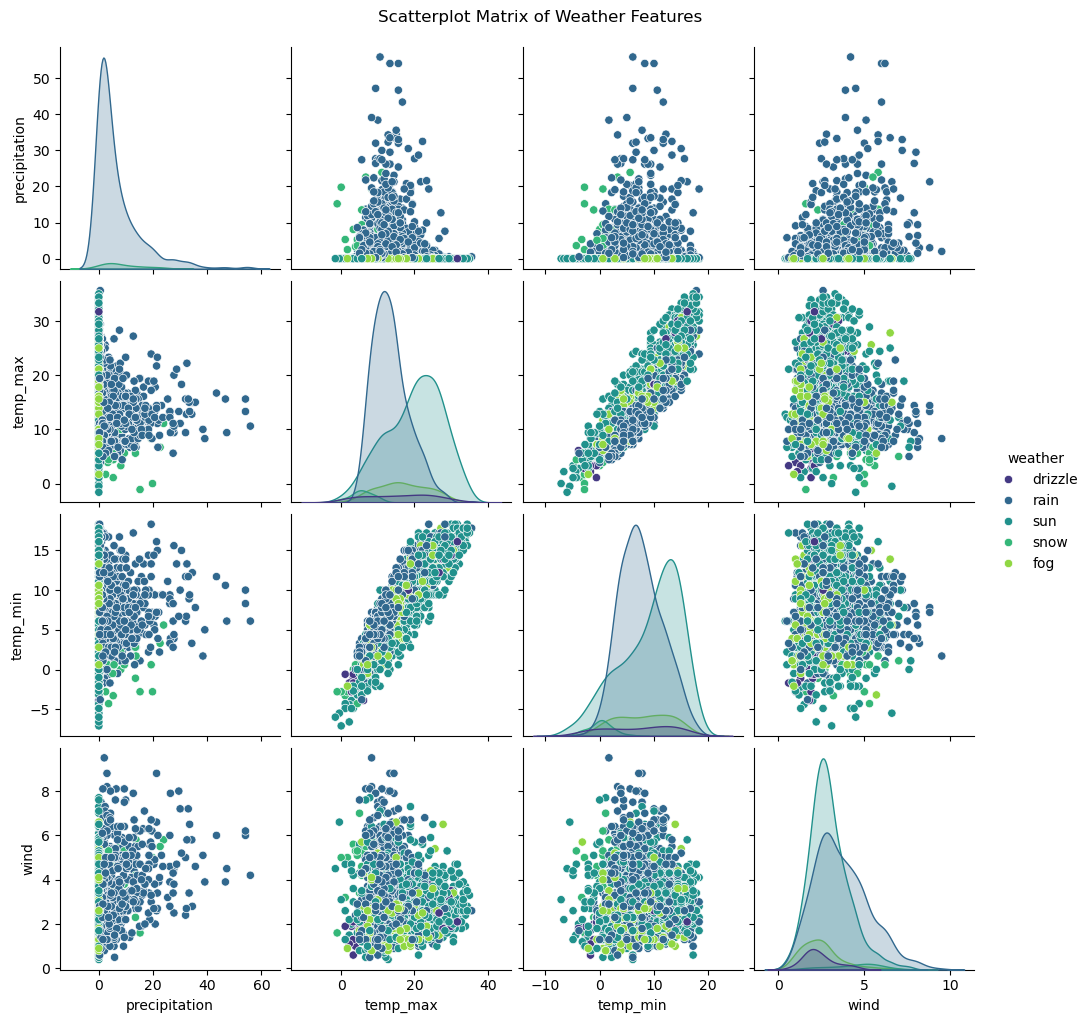

In [73]:
# To get rid of the weather_encoded column/row in the scatterplot
pairplot_data = data[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']]
# Create scatterplot
sns.pairplot(pairplot_data, diag_kind='kde', hue='weather', palette='viridis')
plt.suptitle("Scatterplot Matrix of Weather Features", y=1.02)
plt.show()

## Confusion Matrices
---

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


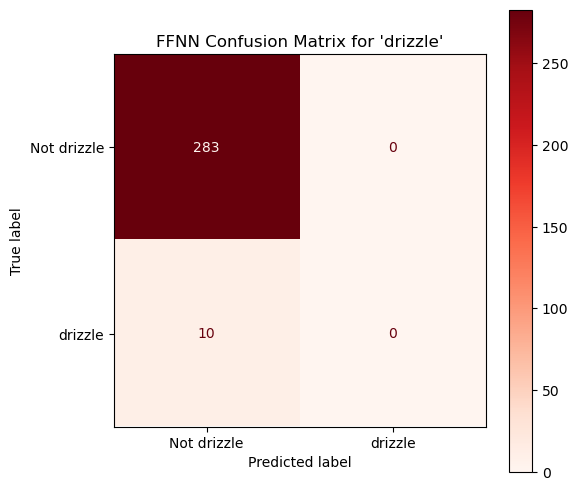

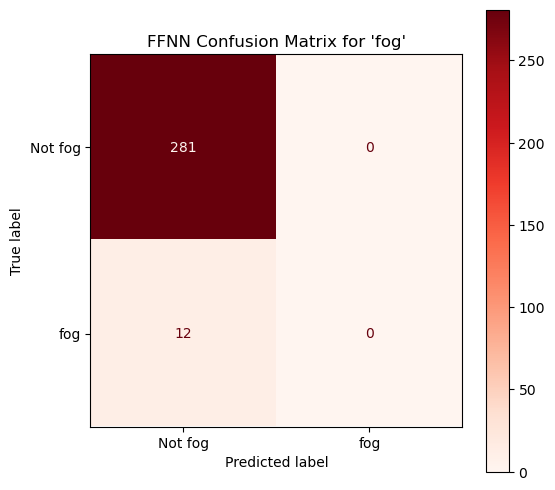

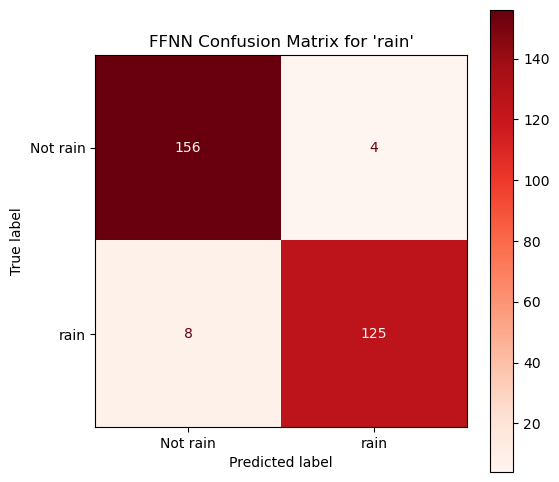

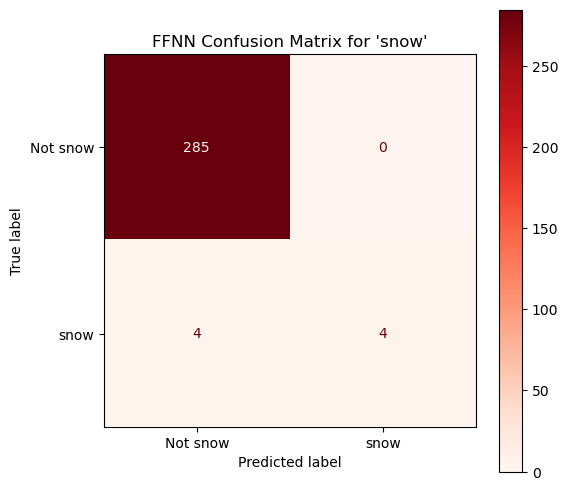

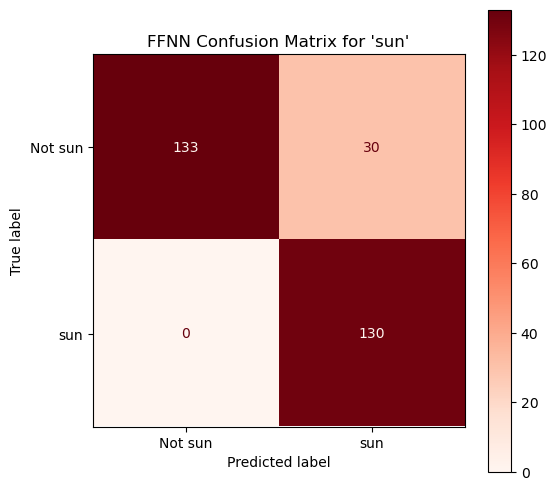

In [74]:
# Generate predictions
y_pred = ff_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from hot encoded back to single label format
y_test_classes = np.argmax(y_test, axis=1)

# Get every class label
labels = label_encoder.classes_

# Generate confusion matrix for each class
for i, label in enumerate(labels):
    
    # Convert predictions and true labels to binary (1 for current class, 0 for all others)
    y_test_binary = (y_test_classes == i).astype(int)
    y_pred_binary = (y_pred_classes == i).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not " + label, label])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Reds', ax=ax)
    plt.title(f"FFNN Confusion Matrix for '{label}'")
    plt.show()

- **Model fails to predict drizzle (note theres only around 53 drizzle samples in dataset)**
- **Model fails to predict fog (101 fog samples)**
- **Does have 4 true positives for snow but 4 false negatives (26 snow samples)**
- **Effective with sun, with some false positives, also effective with rain**
- **Rain and Sun have the highest amount of samples in dataset, dataset is imbalanced**
- **Not necessarily bad since rain and sun dominating may reflect real world scenarios**


## Precision, Recall, and F1-Score
---

In [75]:
# Generate predictions
y_pred = ff_model.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)  

# Convert y_test back to single label format
y_test_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_, zero_division=0))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.97      0.94      0.95       133
        snow       1.00      0.50      0.67         8
         sun       0.81      1.00      0.90       130

    accuracy                           0.88       293
   macro avg       0.56      0.49      0.50       293
weighted avg       0.83      0.88      0.85       293



## Further Verification using row 15 from the dataset
Using the Following inputs.

*   `precipitation` = 2.5
*   `temp_max` = 1.7
*   `temp_min` = -2.8
*   `wind` = 5.0
*   `weather` = 3 (Snow)
---

In [76]:
input_data = pd.DataFrame([[2.5, 1.7, -2.8, 5.0]], columns=['precipitation', 'temp_max', 'temp_min', 'wind'])
# Preprocess the input data, use same scaler fitted on training data
input_scaled = scaler.transform(input_data)

# Predic probabilities
predicted_probabilities = ff_model.predict(input_scaled)

# Get the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=1)

# Convert encoded label to string label
predicted_weather = label_encoder.inverse_transform(predicted_class)  # Convert the encoded label to original string labels

# Result
print("The weather is:", predicted_weather[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The weather is: snow


**Correctly predicts snow**

## Testing machine learning models as a benchmark

---

- **Gradient Boosting Model**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
# Encode the weather column
label_encoder_gb = LabelEncoder()
data['weather_encoded'] = label_encoder_gb.fit_transform(data['weather'])

# Extract features and target column weather
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather_encoded']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train GB model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder_gb.classes_)

print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")
print("Gradient Boosting Classification Report:")
print(classification_rep)

Gradient Boosting Accuracy: 81.57%
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     drizzle       0.50      0.11      0.18         9
         fog       0.20      0.04      0.07        25
        rain       0.93      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56      0.45      0.47       293
weighted avg       0.77      0.82      0.78       293



## GB Confusion Matrix

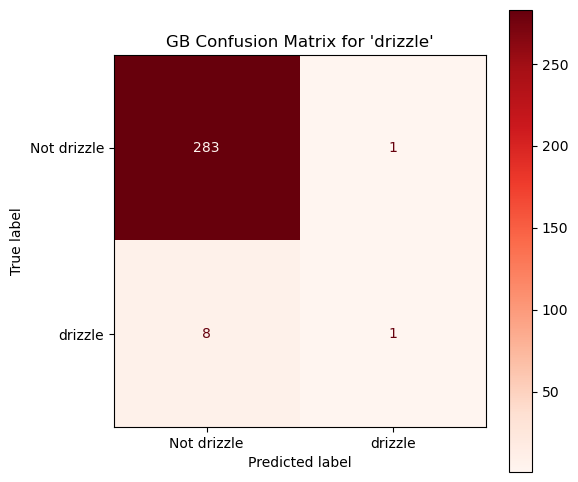

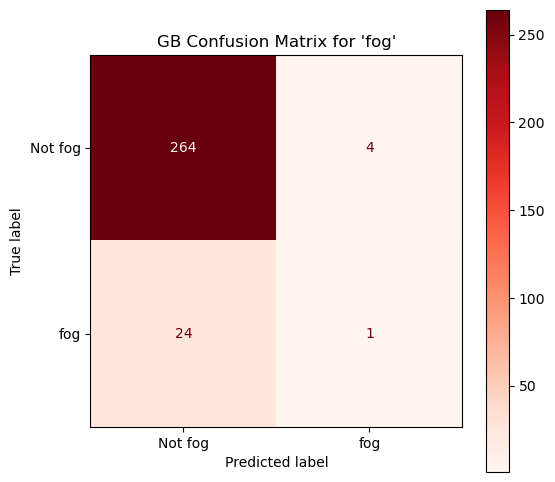

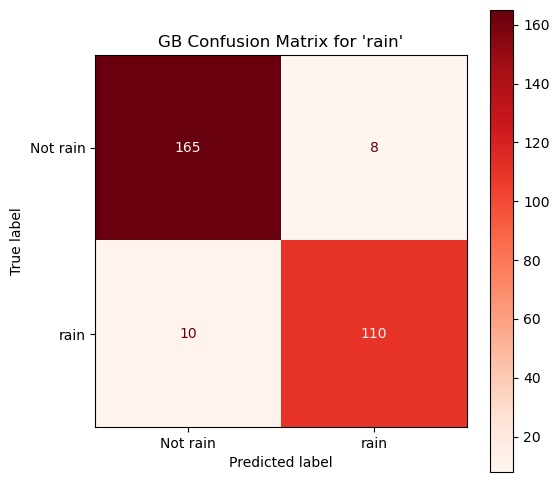

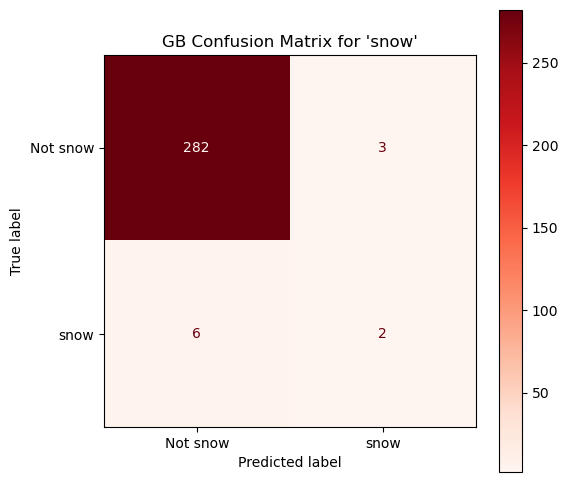

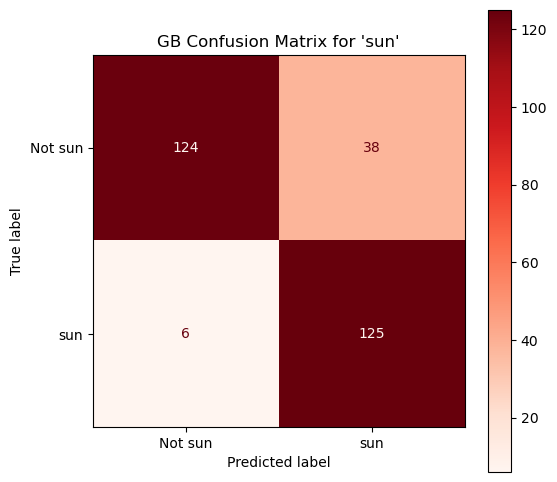

In [78]:
labels = label_encoder_gb.classes_ 
for i, label in enumerate(labels):
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)

    cm = confusion_matrix(y_test_binary, y_pred_binary)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not " + label, label])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Reds', ax=ax)
    plt.title(f"GB Confusion Matrix for '{label}'")
    plt.show()

## Gradient Boosting Importance

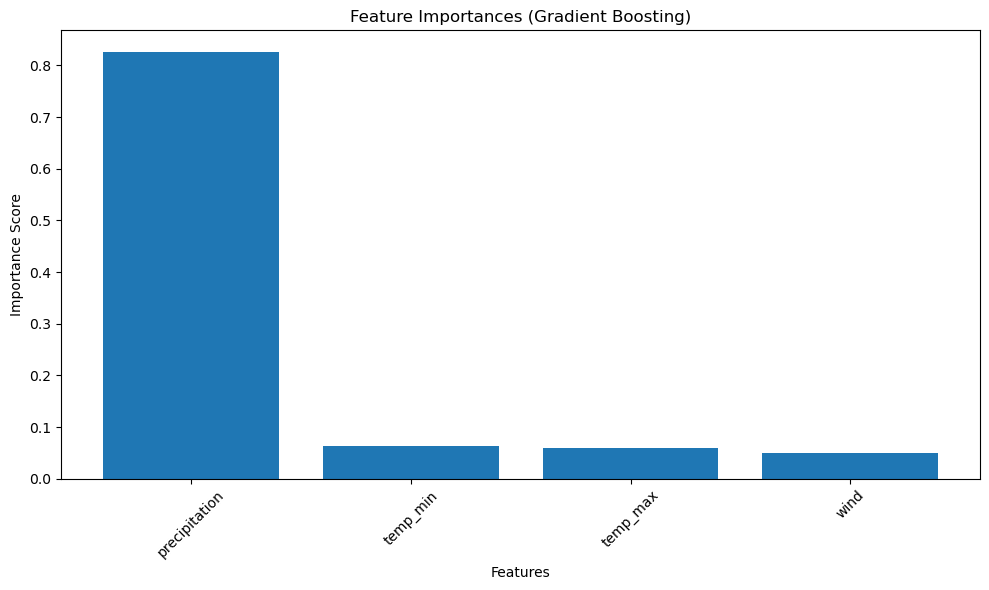

In [79]:
# GB Importance
importances = gb_model.feature_importances_
feature_names = features

indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
# Encode the weather column
label_encoder_rf = LabelEncoder()
data['weather_encoded'] = label_encoder_rf.fit_transform(data['weather'])

# Extract features and target column
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather_encoded']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder_rf.classes_)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\n Random Forest Classification Report:")
print(classification_rep)

Random Forest Accuracy: 81.57%

 Random Forest Classification Report:
              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.93      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293



## RF Confusion Matrix

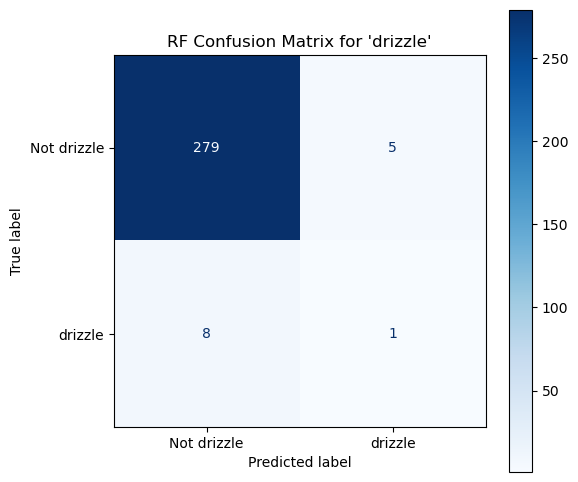

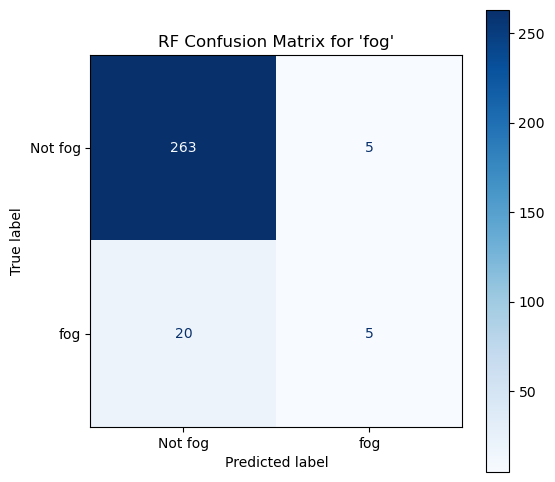

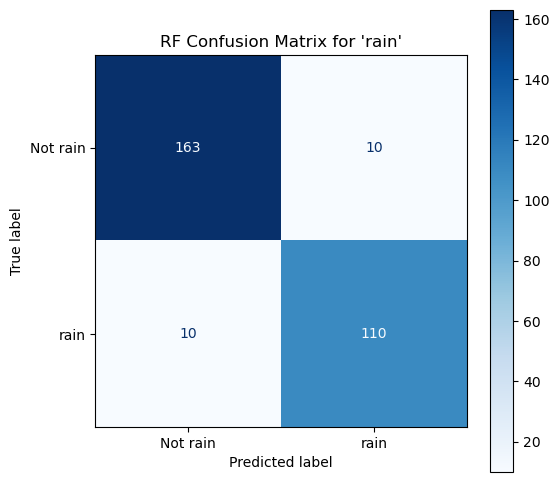

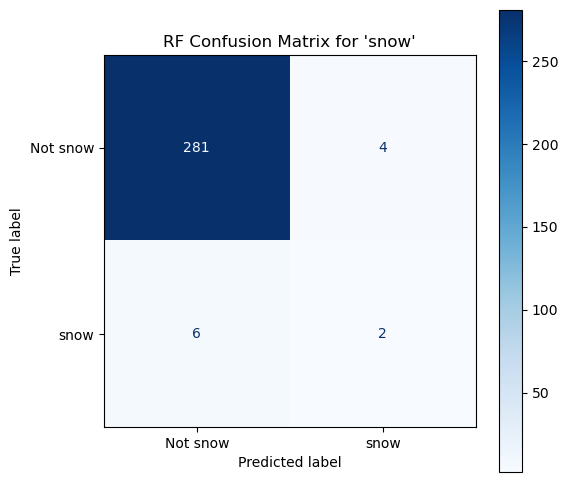

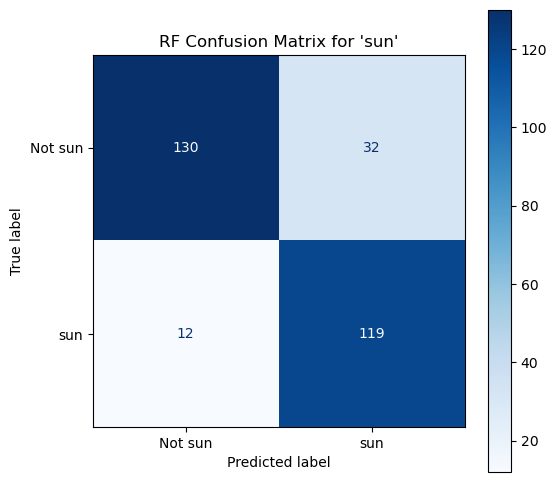

In [54]:
labels = label_encoder_rf.classes_

for i, label in enumerate(labels):
    
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)

    cm = confusion_matrix(y_test_binary, y_pred_binary)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not " + label, label])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f"RF Confusion Matrix for '{label}'")
    plt.show()

## RF Feature Importance

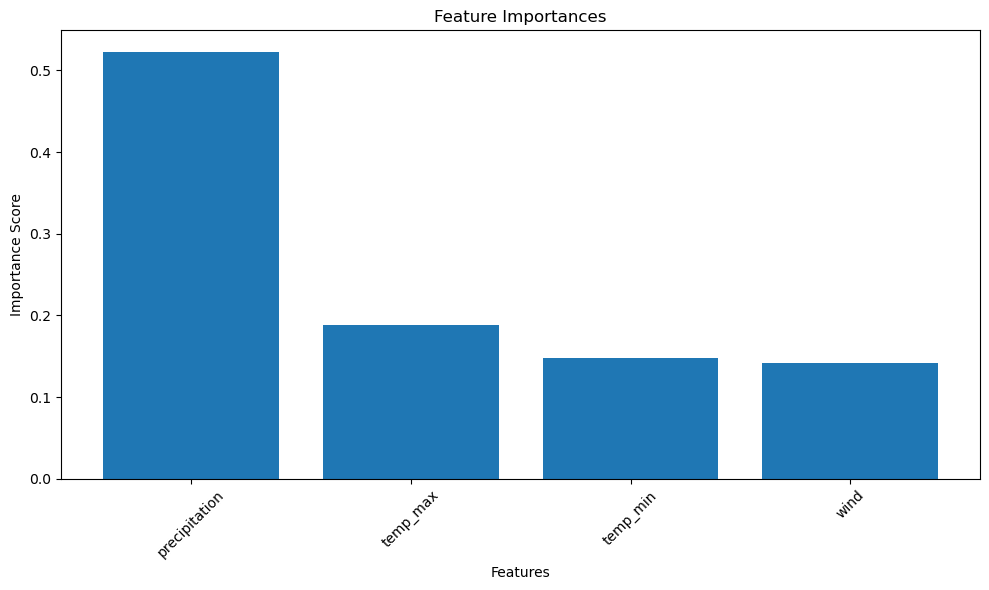

In [84]:
importances = rf_classifier.feature_importances_
feature_names = X.columns
# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## XGboost

In [85]:
from xgboost import XGBClassifier
# XG Boost Model
# Encode the weather column
label_encoder_xgb = LabelEncoder()
data['weather_encoded'] = label_encoder_xgb.fit_transform(data['weather'])
# Split the dataset, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder_xgb.classes_)

print(f"XG Boost Accuracy: {accuracy * 100:.2f}%")
print("\nXG Boost Classification Report:")
print(classification_rep)

XG Boost Accuracy: 80.89%

XG Boost Classification Report:
              precision    recall  f1-score   support

     drizzle       0.17      0.11      0.13         9
         fog       0.50      0.20      0.29        25
        rain       0.92      0.92      0.92       120
        snow       0.33      0.25      0.29         8
         sun       0.79      0.91      0.84       131

    accuracy                           0.81       293
   macro avg       0.54      0.48      0.49       293
weighted avg       0.78      0.81      0.79       293



## XGB Confusion Matrix

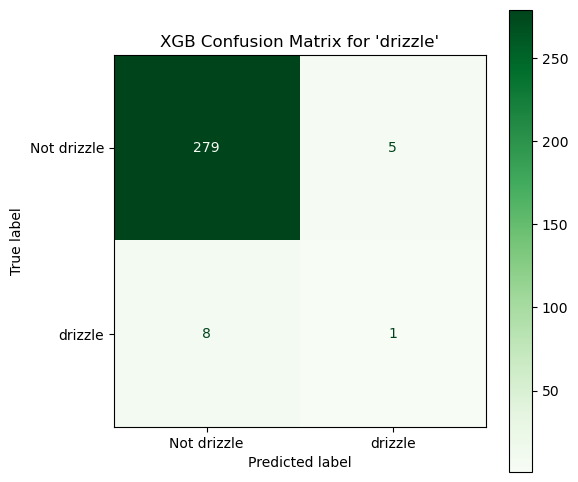

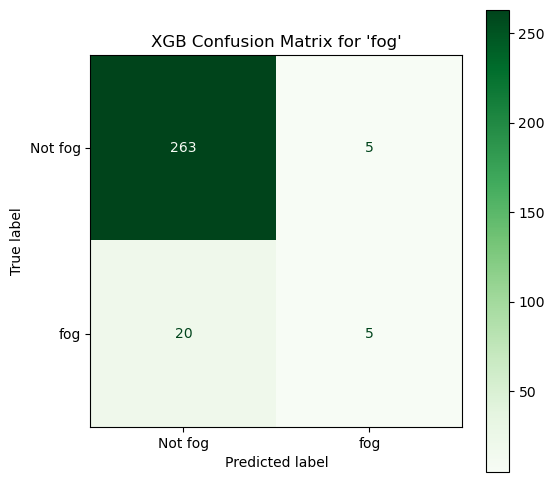

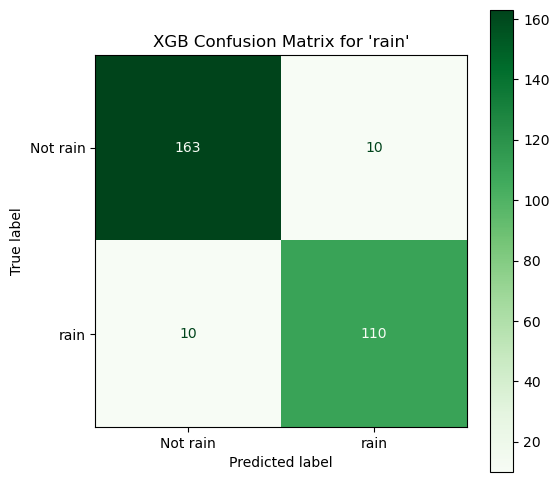

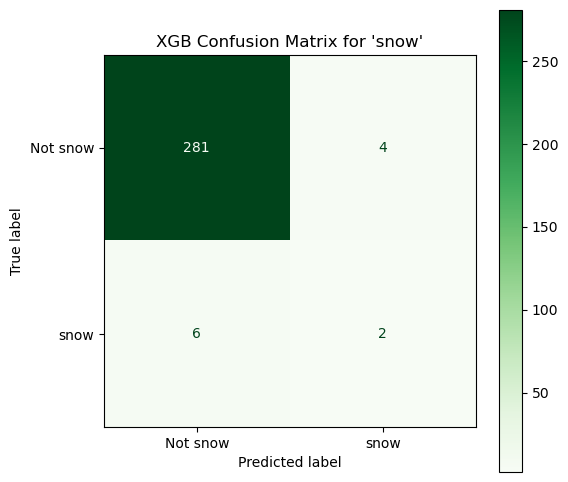

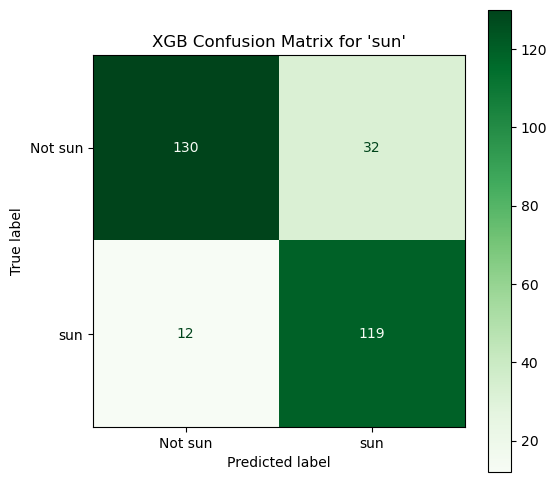

In [55]:
labels = label_encoder_xgb.classes_

for i, label in enumerate(labels):
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not " + label, label])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Greens', ax=ax)
    plt.title(f"XGB Confusion Matrix for '{label}'")
    plt.show()

## XGB Importance

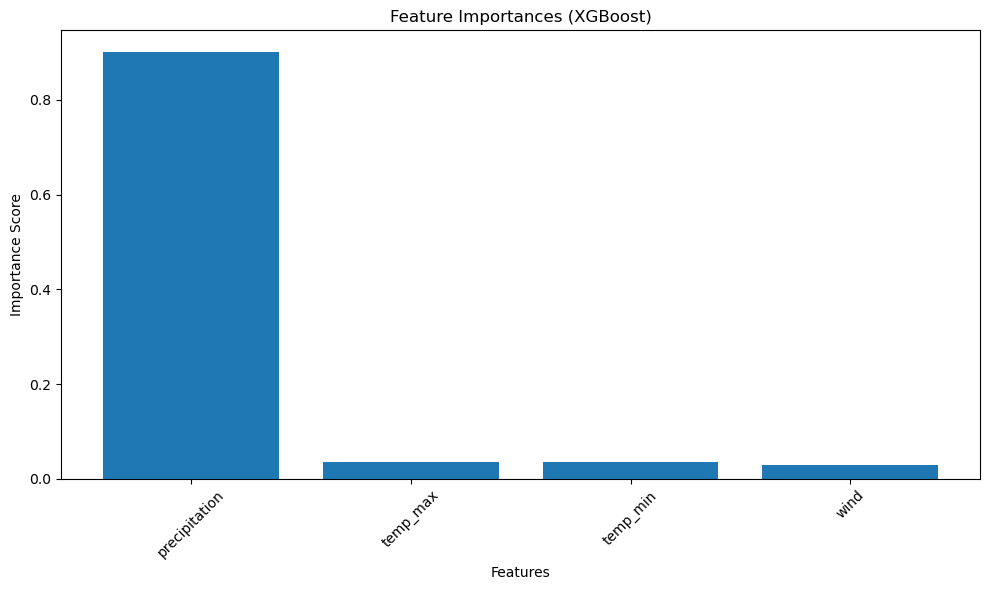

In [36]:
# Get feature importances from the trained model
importances = xgb_classifier.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
